Using device: mps


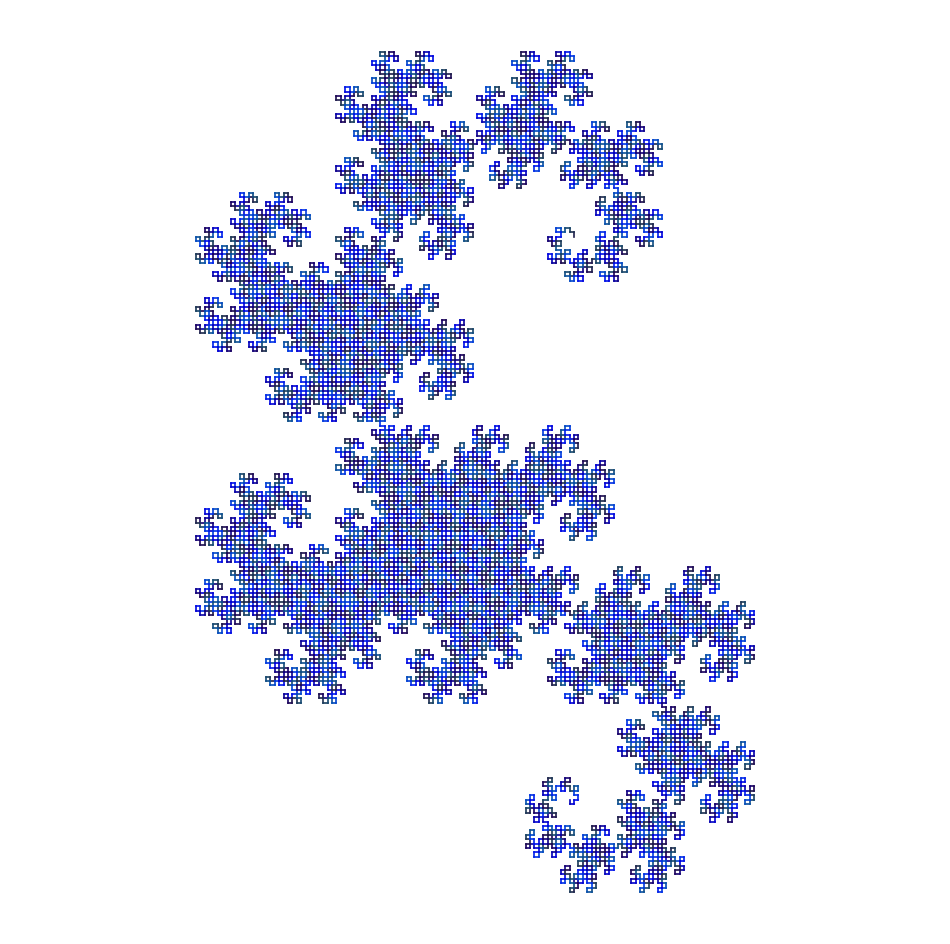

In [ ]:
import torch
import matplotlib.pyplot as plt

# Device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

def dragon_turns(n: int, device=device):
    # +1 = left, -1 = right
    turns = torch.empty(0, dtype=torch.int8, device=device)
    left  = torch.tensor([1], dtype=torch.int8, device=device)
    for _ in range(n):
        if turns.numel() == 0:
            turns = left.clone()
        else:
            turns = torch.cat([turns, left, -turns.flip(0)], dim=0)
    return turns  # length = 2^n - 1

def dragon_points(n: int, step=1.0, device=device):
    turns = dragon_turns(n, device=device)                 # (2^n - 1,)
    delta = turns.to(torch.int32)                          # +1/-1
    # Orientation of each step: 0=E,1=N,2=W,3=S
    ori = torch.cumsum(torch.cat([torch.zeros(1, dtype=torch.int32, device=device), delta]), dim=0) % 4  # (2^n,)
    # Map orientations to step vectors
    dirs = torch.tensor([[ 1., 0.],
                         [ 0., 1.],
                         [-1., 0.],
                         [ 0.,-1.]], device=device)        # (4,2)
    steps = dirs[ori] * step                               # (2^n,2)
    pts = torch.cumsum(steps, dim=0)                       # (2^n,2)
    pts = torch.vstack([torch.zeros(1,2, device=device), pts])  # prepend origin -> (2^n+1,2)
    return pts

# Draw
n = 14
pts = dragon_points(n, step=1.0, device=device).cpu().numpy()
plt.figure(figsize=(8,8))
plt.plot(pts[:,0], pts[:,1], linewidth=0.5)
plt.axis("equal")
plt.title(f"Dragon Curve with Correct Turn Sequencing (n={n}, PyTorch)")
plt.show()
